# Heart Disease prediction

## Importing essential libraries

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings("ignore")

['.ipynb_checkpoints', 'Bar_chart_examples.ipynb', 'Dataframe_examples.ipynb', 'Feature vs Target.png', 'heart-disease-prediction.ipynb', 'heart.csv', 'line_chart_examples.ipynb', 'outliers_boxplots.png', 'performance.png', 'series_examples.ipynb', 'skewness.png', 'Stacked_barchart_examples.ipynb', 'target_distribution.png', 'train_test_split_vertical.png']


##  1.Data Collection and Analyze data

In [60]:
data= pd.read_csv("heart.csv")

In [61]:
type(data)

pandas.core.frame.DataFrame

In [62]:
data.shape

(303, 14)

In [63]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [64]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

### Description of columns

In [65]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(data.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


## 2.Finding Machine Learning method

Learning Type: Supervised Learning
Reason: Target variable is present
Subtype: Classification (because the target is categorical)

In [66]:
# True numeric/continuous columns
numeric_columns = ["age", "trestbps", "chol", "thalach", "oldpeak"]

# Categorical (discrete, encoded as numbers)
categorical_columns = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal", "target"]

# 3.Exploratory Data Analysis (EDA) 

### Data Inspection/cleaning

                                         ##Target variable analyze( categorical operation)

#### Unique values & counts

In [67]:
data['target'].unique()             # No duplicates

array([1, 0])

In [68]:
data['target'].value_counts()         #fairly balanced (almost 55:45)No special handling is required.

target
1    165
0    138
Name: count, dtype: int64

#### Class balance check

In [69]:
percentage=data['target'].value_counts(normalize=True)*100
print(percentage)

target
1    54.455446
0    45.544554
Name: proportion, dtype: float64


#### visualization

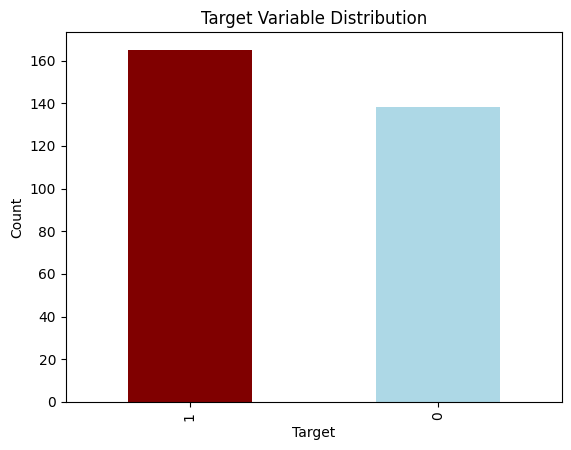

In [70]:
data['target'].value_counts().plot(kind='bar', color=['maroon', 'lightblue'])
plt.title("Target Variable Distribution")
plt.xlabel("Target")
plt.ylabel("Count")
plt.savefig("target_distribution.png", dpi=300, bbox_inches='tight')
plt.show()

Insights:
The target variable has two classes (0 and 1). The distribution is approximately 54.5% for class 1 and 45.5% for class 0.
Since the proportions are close to each other, the dataset is considered balanced.

                                             ## Other columns/Feature analyze

### Finding missing/null values and dtypes

In [71]:
data.info()              #shows columns have no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Finding duplicates

In [72]:
duplicate=data.duplicated().sum()
print(duplicate)

1


#### Handling duplicates

In [73]:
data = data.drop_duplicates()
print(data.duplicated().sum())

0


In [74]:
data.shape

(302, 14)

Insights:
The dataset contains no null values across any of the columns, so no imputation or missing value handling is required and no dtypes error.

In [75]:
                                                   ## categorical columns vs target analyze

### Statistical method

In [76]:
print(data.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.435601
cp          0.432080
oldpeak     0.429146
thalach     0.419955
ca          0.408992
slope       0.343940
thal        0.343101
sex         0.283609
age         0.221476
trestbps    0.146269
restecg     0.134874
chol        0.081437
fbs         0.026826
Name: target, dtype: float64


#### visualization

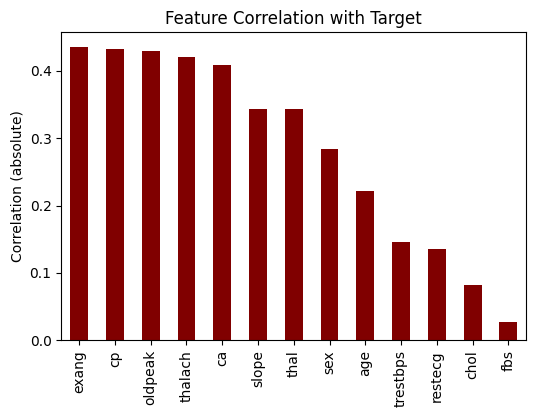

In [77]:
corr_with_target = data.corr()["target"].abs().sort_values(ascending=False)

plt.figure(figsize=(6,4))
corr_with_target[1:].plot(kind="bar", color="maroon")  # skip target itself
plt.title("Feature Correlation with Target")
plt.ylabel("Correlation (absolute)")
plt.savefig("Feature vs Target.png")
plt.show()

We'll analyse 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca' and 'thal' features

### Analysing the 'Sex' feature

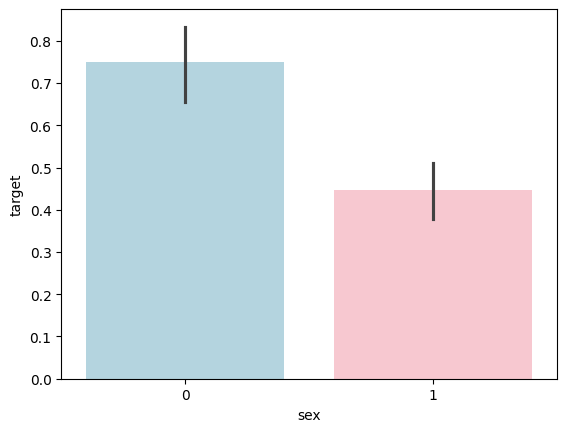

In [78]:
sns.barplot(x="sex", y="target", data=data, palette=["lightblue", "pink"])
plt.show()

### Analysing the 'Chest Pain Type' feature

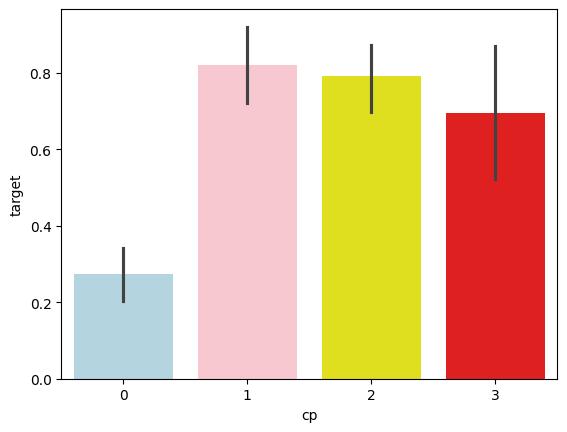

In [79]:
sns.barplot(x="cp", y="target", data=data, palette=["lightblue", "pink","yellow","red"])
plt.show()

### Analysing the FBS feature

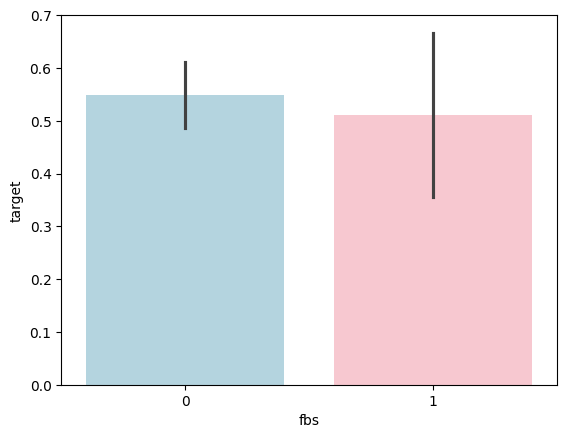

In [80]:
sns.barplot(x="fbs", y="target", data=data, palette=["lightblue", "pink"])
plt.show()

### Analysing the restecg feature

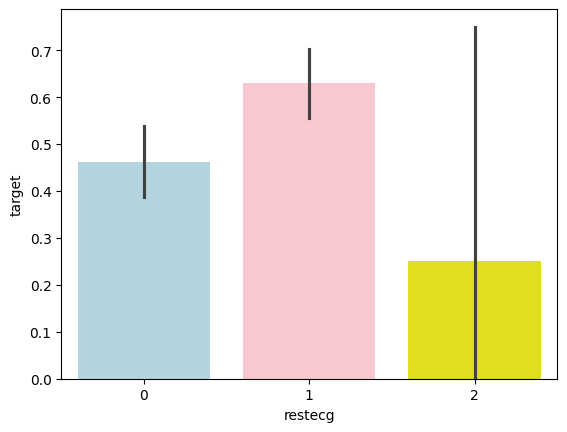

In [81]:
sns.barplot(x="restecg", y="target", data=data, palette=["lightblue", "pink","yellow"])
plt.show()

### Analysing the 'exang' feature

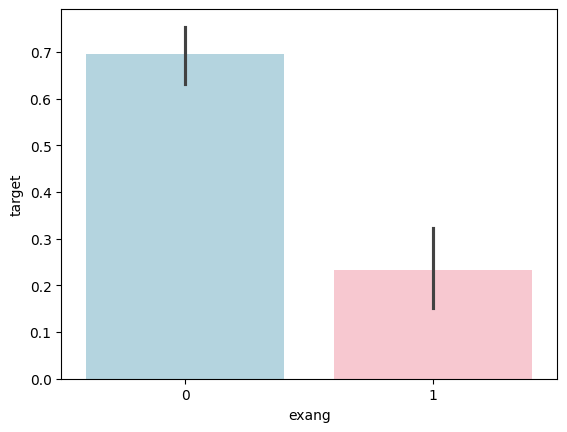

In [82]:
sns.barplot(x="exang", y="target", data=data, palette=["lightblue", "pink"])
plt.show()

### Analysing the Slope feature

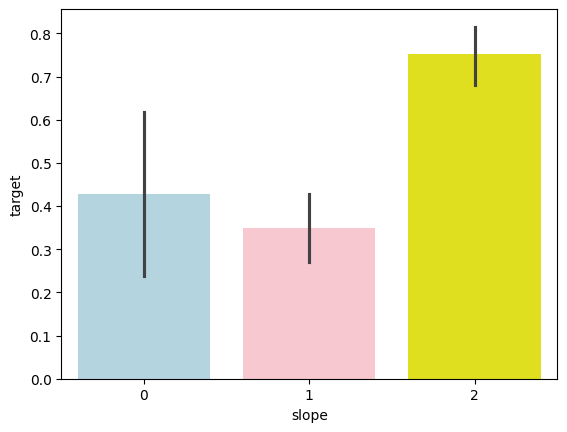

In [83]:
sns.barplot(x="slope", y="target", data=data, palette=["lightblue", "pink","yellow"])
plt.show()

### Analysing the 'ca' feature

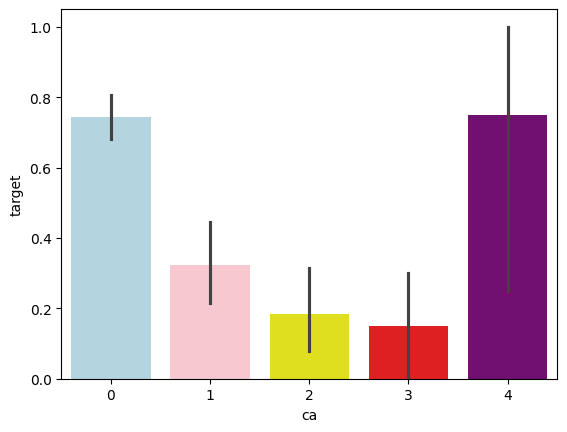

In [84]:
sns.barplot(x="ca", y="target", data=data, palette=["lightblue", "pink","yellow","red","purple"])
plt.show()

### Analysing the 'thal' feature


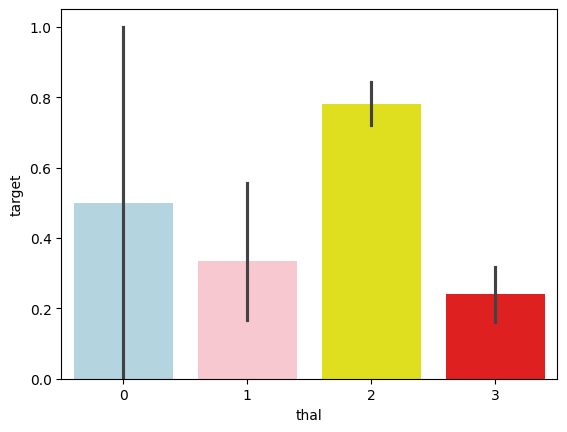

In [85]:
sns.barplot(x="thal", y="target", data=data, palette=["lightblue", "pink","yellow","red"])
plt.show()

Insights:
Features like chest pain (cp), exercise angina (exang), oldpeak, thalach, ca, slope, thal are the most important predictors for the target. Features like fbs and chol have very little influence.

                                             # Numeric columns analyze

#4. Handle Outliers

### Statistical method = IQR (Interquartile Range)

In [86]:
numeric_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1                                                           #IQR measures the spread of the middle 50% of the data.
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower) | (data[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")

age: 0 outliers
trestbps: 9 outliers
chol: 5 outliers
thalach: 1 outliers
oldpeak: 5 outliers


### visualization method

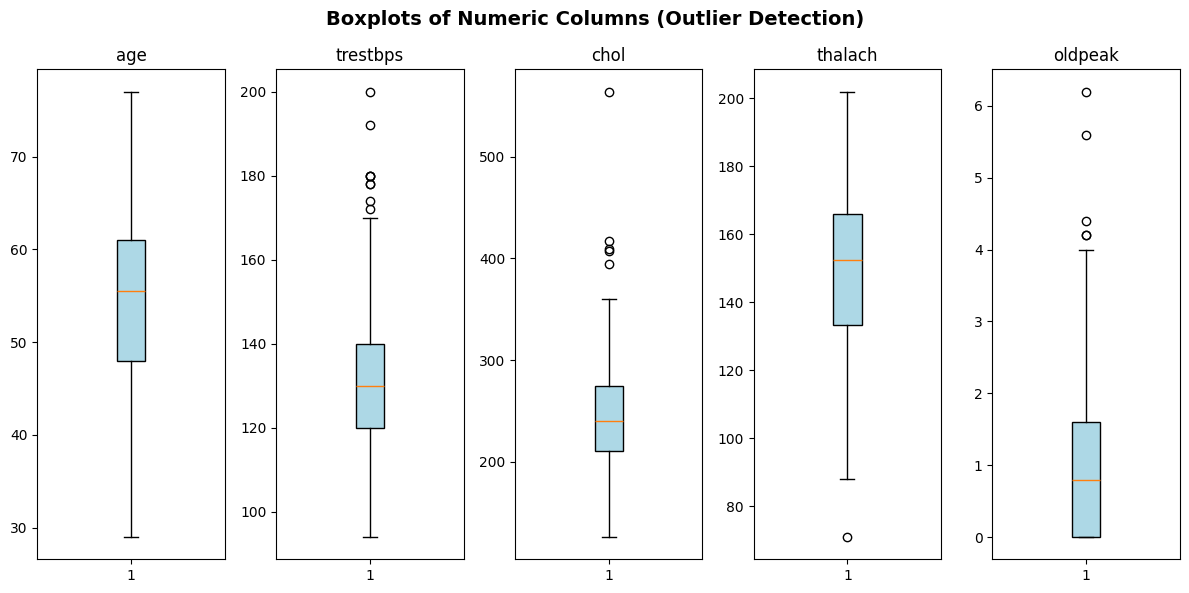

In [87]:
import matplotlib.pyplot as plt

numeric_cols = ["age", "trestbps", "chol", "thalach", "oldpeak"]

plt.figure(figsize=(12,6))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, len(numeric_cols), i)
    plt.boxplot(data[col], patch_artist=True, boxprops=dict(facecolor="lightblue"))
    plt.title(col)

plt.suptitle("Boxplots of Numeric Columns (Outlier Detection)", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.savefig("outliers_boxplots.png")
plt.show()

Outliers present in trestbps (9), chol (5), thalach (1), oldpeak (5).
No outliers in age.
Since dataset is small, outliers are not removed to avoid information loss.

# 5. Handle Skewness / Normalize Data                        

### Statistical method1

In [88]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### Method2

In [89]:
data[numeric_columns].skew()       #pandas method

age        -0.203743
trestbps    0.716541
chol        1.147332
thalach    -0.532671
oldpeak     1.266173
dtype: float64

Insights:

🔹chol(+1.14), oldpeak(+1.27) → Need to Handle (|skew| > 1, strong right skew)

🔹trestbps(+0.71), thalach(–0.54) → Optional (0.5 < |skew| ≤ 1, moderate skew)

🔹age(–0.20) → No handling needed (|skew| ≤ 0.5, symmetric).

### visualization method

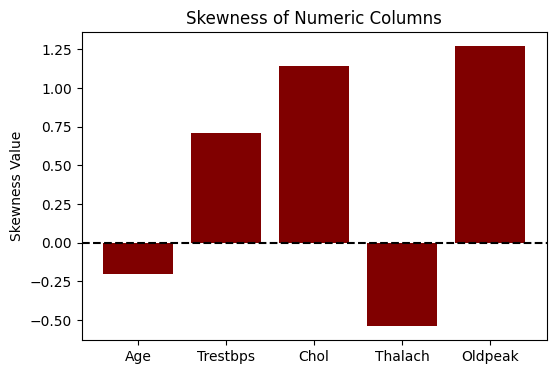

In [90]:
import matplotlib.pyplot as plt

skew_vals = {
    "Age": -0.20,
    "Trestbps": 0.71,
    "Chol": 1.14,
    "Thalach": -0.54,
    "Oldpeak": 1.27
}

plt.figure(figsize=(6,4))
plt.bar(skew_vals.keys(), skew_vals.values(), color="maroon")
plt.axhline(0, color="black", linestyle="--")
plt.title("Skewness of Numeric Columns")
plt.ylabel("Skewness Value")
plt.savefig("skewness.png")
plt.show()

## Handling Skewness

#### Log Transformation(values are positive and large)

In [91]:
import numpy as np
data['chol_log'] = np.log1p(data['chol'])
data['oldpeak_log'] = np.log1p(data['oldpeak'])

In [92]:
data[['chol_log', 'oldpeak_log']].skew()

chol_log       0.088562
oldpeak_log    0.391946
dtype: float64

#### Square Root Transformation (data has moderate skewness and column values are non-negative)

In [93]:
data['trestbps_sqrt'] = np.sqrt(data['trestbps'])

In [94]:
data['trestbps_sqrt'].skew()

np.float64(0.4965869206742481)

In [95]:
data['thalach_cbrt']=np.cbrt(data['thalach'])

In [96]:
data['thalach_cbrt'].skew()

np.float64(-0.8277223448306088)

After transformation, skewness values moved closer to 0 (near-symmetric).
No transformation needed for Age (already symmetric).

## After transformation

In [97]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target', 'chol_log',
       'oldpeak_log', 'trestbps_sqrt', 'thalach_cbrt'],
      dtype='object')

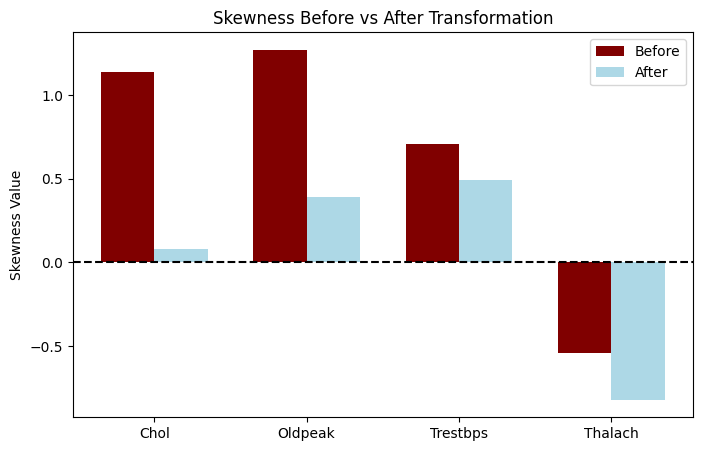

In [98]:

import matplotlib.pyplot as plt
import numpy as np

columns = ["Chol", "Oldpeak", "Trestbps", "Thalach"]
before = [1.14, 1.27, 0.71, -0.54]
after  = [0.08, 0.39, 0.49, -0.82]

x = np.arange(len(columns))
width = 0.35  

plt.figure(figsize=(8,5))
plt.bar(x - width/2, before, width, label="Before", color="maroon")
plt.bar(x + width/2, after, width, label="After", color="lightblue")
plt.axhline(0, color="black", linestyle="--")
plt.xticks(x, columns)
plt.ylabel("Skewness Value")
plt.title("Skewness Before vs After Transformation")
plt.legend()
plt.savefig("skewness.png")
plt.show()

# 6.Scaling

In [99]:
from sklearn.preprocessing import StandardScaler

numeric_cols = ['age','trestbps','chol','thalach','oldpeak']  # example numeric columns
scaler = StandardScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

In [100]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target', 'chol_log',
       'oldpeak_log', 'trestbps_sqrt', 'thalach_cbrt'],
      dtype='object')

In [105]:
# Check mean and standard deviation
print(abs(data[numeric_cols].mean().round(2)))

age         0.0
trestbps    0.0
chol        0.0
thalach     0.0
oldpeak     0.0
dtype: float64


In [106]:
print(data[numeric_cols].std())

age         1.00166
trestbps    1.00166
chol        1.00166
thalach     1.00166
oldpeak     1.00166
dtype: float64


All features centered around 0 mean.All features normalized to unit variance (σ ≈ 1)
Ensures that no feature dominates model due to magnitude differences

# 7.Encoding

In [107]:
import pandas as pd

# Multiclass categorical columns
multiclass_cols = ['cp', 'restecg', 'slope', 'thal', 'ca']

# Apply One-Hot Encoding
data = pd.get_dummies(data, columns=multiclass_cols, drop_first=True)

print(data.head())

        age  sex  trestbps      chol  fbs   thalach  exang   oldpeak  target  \
0  0.949794    1  0.764066 -0.261285    1  0.018826      0  1.084022       1   
1 -1.928548    1 -0.091401  0.067741    0  1.636979      0  2.118926       1   
2 -1.485726    0 -0.091401 -0.822564    0  0.980971      0  0.307844       1   
3  0.174856    1 -0.661712 -0.203222    0  1.243374      0 -0.209608       1   
4  0.285561    0 -0.661712  2.080602    0  0.587366      1 -0.382092       1   

   chol_log  ...  restecg_2  slope_1  slope_2  thal_1  thal_2  thal_3   ca_1  \
0  5.455321  ...      False    False    False    True   False   False  False   
1  5.525453  ...      False    False    False   False    True   False  False   
2  5.323010  ...      False    False     True   False    True   False  False   
3  5.468060  ...      False    False     True   False    True   False  False   
4  5.872118  ...      False    False     True   False    True   False  False   

    ca_2   ca_3   ca_4  
0  False  Fal

In [108]:
print(data.columns)

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'target', 'chol_log', 'oldpeak_log', 'trestbps_sqrt', 'thalach_cbrt',
       'cp_1', 'cp_2', 'cp_3', 'restecg_1', 'restecg_2', 'slope_1', 'slope_2',
       'thal_1', 'thal_2', 'thal_3', 'ca_1', 'ca_2', 'ca_3', 'ca_4'],
      dtype='object')


In [109]:
print("Shape after encoding:", data.shape)

Shape after encoding: (302, 27)


# 7. Train Test split

In [110]:
from sklearn.model_selection import train_test_split

predictors = data.drop("target",axis=1)
target = data["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [111]:
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("Y_train:", Y_train.shape)
print("Y_test:", Y_test.shape)

X_train: (241, 26)
X_test: (61, 26)
Y_train: (241,)
Y_test: (61,)


In [112]:
print(Y_train.value_counts())
print(Y_test.value_counts())

target
1    130
0    111
Name: count, dtype: int64
target
1    34
0    27
Name: count, dtype: int64


# 8.Model Training 

1️. Logistic Regression

In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Model
lr = LogisticRegression(max_iter=1000,random_state=42)
lr.fit(X_train, Y_train)

# Prediction
y_pred = lr.predict(X_test)

# Accuracy
accuracy = round(accuracy_score(Y_test, y_pred) * 100, 2)
print(f"Logistic Regression Accuracy: {accuracy}%")

Logistic Regression Accuracy: 88.52%


2️. Naive Bayes

In [114]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

nb = GaussianNB()
nb.fit(X_train, Y_train)

y_pred = nb.predict(X_test)

accuracy = round(accuracy_score(Y_test, y_pred) * 100, 2)
print(f"Naive Bayes Accuracy: {accuracy}%")

Naive Bayes Accuracy: 85.25%


3️. Support Vector Machine (SVM)

In [115]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm = SVC()
svm.fit(X_train, Y_train)

y_pred = svm.predict(X_test)

accuracy = round(accuracy_score(Y_test, y_pred) * 100, 2)
print(f"SVM Accuracy: {accuracy}%")

SVM Accuracy: 85.25%


4️. K-Nearest Neighbors (KNN)

In [116]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

y_pred = knn.predict(X_test)

accuracy = round(accuracy_score(Y_test, y_pred) * 100, 2)
print(f"KNN Accuracy: {accuracy}%")

KNN Accuracy: 85.25%


5.Decision Tree

In [119]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, Y_train)

# Prediction
y_pred = dt.predict(X_test)

# Accuracy
accuracy = round(accuracy_score(Y_test, y_pred) * 100, 2)
print(f"Decision Tree Accuracy: {accuracy}%")

Decision Tree Accuracy: 72.13%


6. Random Forest

In [120]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, Y_train)

y_pred = rf.predict(X_test)

accuracy = round(accuracy_score(Y_test, y_pred) * 100, 2)
print(f"Random Forest Accuracy: {accuracy}%")

Random Forest Accuracy: 83.61%


In [121]:
!pip install xgboost

7️. XGBoost

In [123]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss',random_state=42)
xgb.fit(X_train, Y_train)

y_pred = xgb.predict(X_test)

accuracy = round(accuracy_score(Y_test, y_pred) * 100, 2)
print(f"XGBoost Accuracy: {accuracy}%")

XGBoost Accuracy: 80.33%


8️. Neural Network

In [124]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

nn = MLPClassifier(max_iter=1000,random_state=42)
nn.fit(X_train, Y_train)

y_pred = nn.predict(X_test)

accuracy = round(accuracy_score(Y_test, y_pred) * 100, 2)
print(f"Neural Network Accuracy: {accuracy}%")

Neural Network Accuracy: 81.97%


In [125]:
# Define models in a dictionary
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "Neural Network": MLPClassifier(max_iter=1000, random_state=42)
}

# Train models and calculate accuracy
results = []
for name, model in models.items():
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    acc = round(accuracy_score(Y_test, y_pred) * 100, 2)
    results.append((name, acc))

# Create a DataFrame sorted by accuracy
results_df = pd.DataFrame(results, columns=["Algorithm", "Accuracy (%)"])
results_df = results_df.sort_values(by="Accuracy (%)", ascending=False).reset_index(drop=True)
print(results_df)

             Algorithm  Accuracy (%)
0  Logistic Regression         88.52
1          Naive Bayes         85.25
2                  SVM         85.25
3                  KNN         85.25
4        Random Forest         83.61
5       Neural Network         81.97
6              XGBoost         80.33
7        Decision Tree         72.13


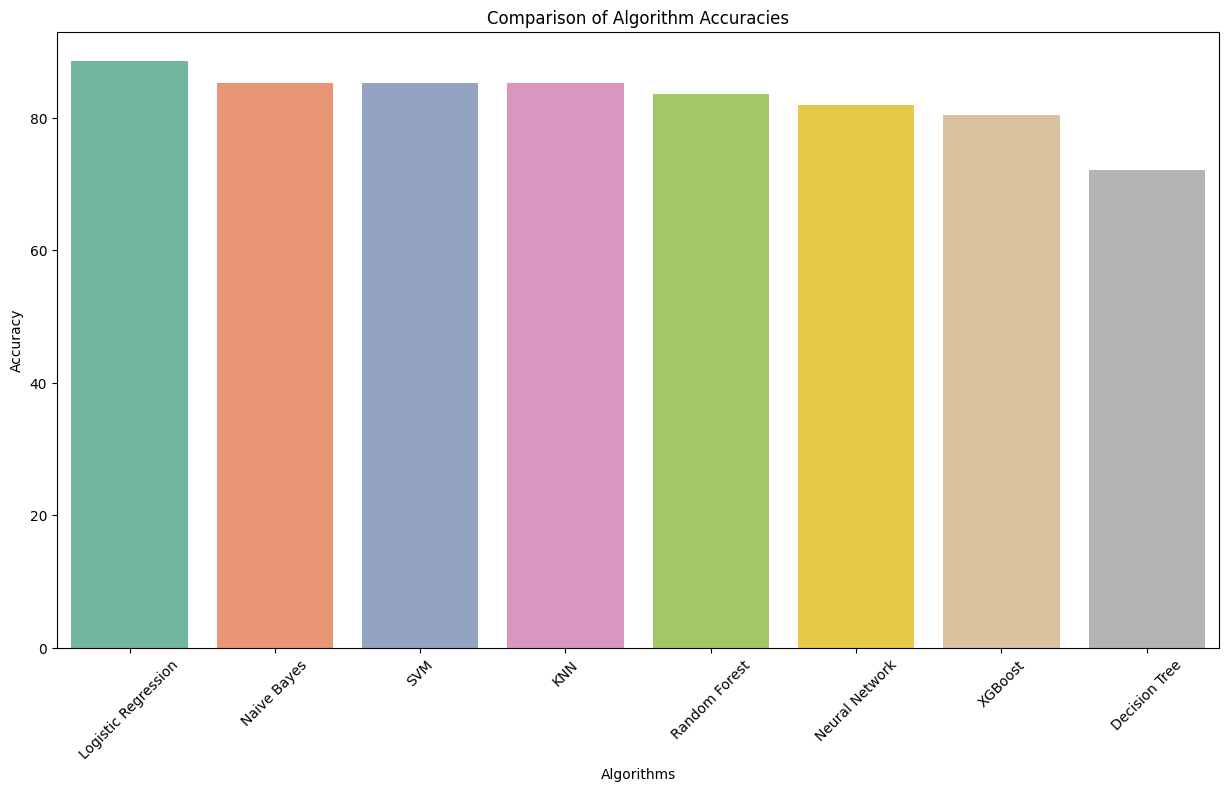

In [126]:
# Set figure size
plt.figure(figsize=(15,8))

# Plot bar chart with different colors
sns.barplot(x="Algorithm", y="Accuracy (%)", data=results_df, palette="Set2")  # palette adds different colors

# Labels and title
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.title("Comparison of Algorithm Accuracies")
plt.xticks(rotation=45)

# Show plot
plt.savefig("performance.png")
plt.show()

Insights:

Logistic Regression gave the highest accuracy (88.52%), making it the best model for this dataset.

Decision Tree performed the lowest (72.13%), possibly due to overfitting.

Ensemble methods like Random Forest and XGBoost performed well but slightly lower than Logistic Regression.

Simple algorithms like Naive Bayes, SVM, and KNN also gave good results (85.25%).